In [259]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [260]:
pokemon = pd.read_csv("pokemon.csv")
pokemon

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [303]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    object
dtypes: int64(9), object(4)
memory usage: 81.4+ KB


In [304]:
pokemon.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


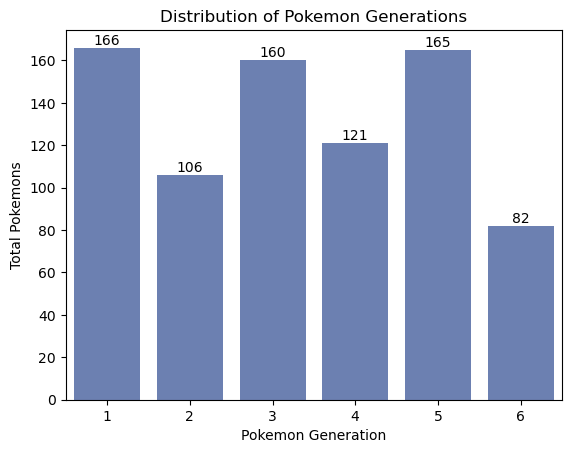

In [279]:
sns.countplot(x="Generation", data=pokemon, color="#607cbc")

plt.title("Distribution of Pokemon Generations")
plt.xlabel("Pokemon Generation")
plt.ylabel("Total Pokemons")
for i, count in enumerate(pokemon['Generation'].value_counts().sort_index()):
    plt.text(i, count + 0.1, str(count), ha='center', va='bottom')
plt.show()

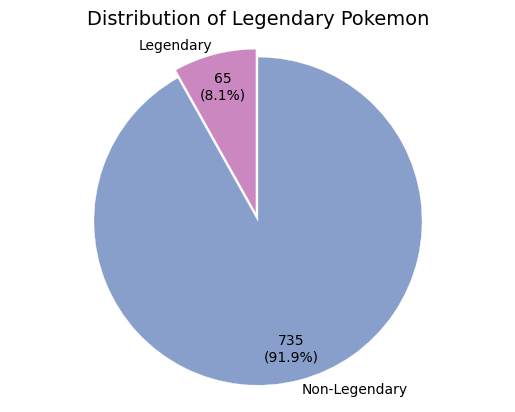

In [285]:
pokemon["Legendary"] = pokemon["Legendary"].replace({True: "Legendary", False: "Non-Legendary"})
legendary_counts = pokemon['Legendary'].value_counts()

# Plotting Pie Chart
labels = legendary_counts.index
sizes = legendary_counts.values

plt.pie(x=sizes,
        labels=labels,
        explode=(0, 0.05),
        labeldistance=1.06,
        startangle=90,
        colors=["#889fcb", "#cb88c0"],
        wedgeprops=dict(edgecolor='w', linewidth=0.25),
        counterclock=False,
        pctdistance=0.8, 
        autopct=lambda p: '{:.0f}\n({:.01f}%)'.format(p * sum(sizes) / 100, p))
plt.axis('equal')

plt.title('Distribution of Legendary Pokemon', fontsize=14)
plt.show()

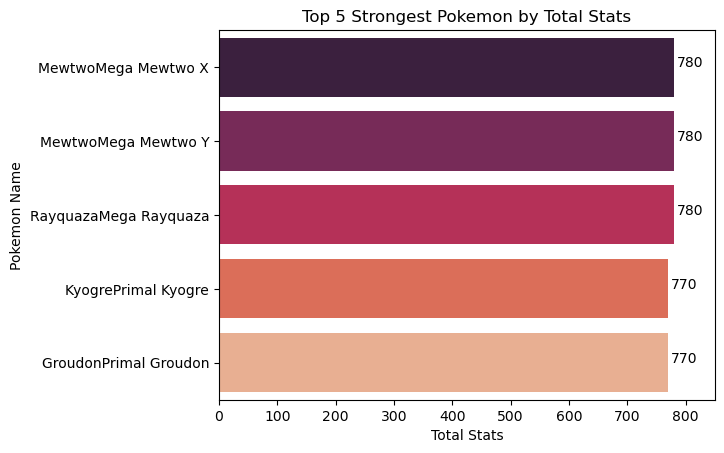

In [298]:
top5_strongest_pokemon = pokemon.nlargest(5, "Total")
sns.barplot(x="Total", y="Name", data=top5_strongest_pokemon, palette="rocket")
plt.title("Top 5 Strongest Pokemon by Total Stats")
plt.xlabel("Total Stats")
plt.ylabel("Pokemon Name")
for i, count in enumerate(top5_strongest_pokemon['Total']):
    plt.text(count + 5, i, str(count))
    
plt.xlim(0, 850)
plt.show()